In [1]:
import ROOT
import numpy as np
from array import array
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1I, TH1F, TH2F, TH3F, TColor, TEfficiency
from ROOT import gROOT, gBenchmark, gRandom, gSystem
import csv

Welcome to JupyROOT 6.26/06


In [2]:
%cd /sphenix/u/egm2153/spring_2023
gROOT.LoadMacro("sPhenixStyle.C");
gROOT.ProcessLine("SetsPhenixStyle()")

/direct/sphenix+u/egm2153/spring_2023


0

sPhenixStyle: Applying nominal settings.
sPhenixStyle: ROOT6 mode


In [3]:
%cd /sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746

/gpfs/mnt/gpfs02/sphenix/user/egm2153/calib_study/detdeta/analysis/runs23727_23746


In [34]:
# systematics 
# MC 
# run by run 
# emcal 1
# emcal 2
# emcal 3u
# emcal 3d
# emcal 4
# ihcal 1
# ihcal 2
# ihcal 3
# ihcal 4
# ohcal 1
# ohcal 2
# ohcal 3
# ohcal 4
# sampling fraction
# phys_list <-
# zs 20
# z vertex

# MC, MC rapidity dep
cent = '50-60'
y_max = {'0-5': 100, '5-10': 90, '10-20': 80, '20-30': 50, '30-40': 30, '40-50': 20, '50-60': 15}
#subdir = ['MC','MC','run_by_run_studies','../physics_lists_comp','hcal_syst','emcal_syst','emcal_syst','emcal_syst','emcal_syst','emcal_syst',
#          'hcal_syst','hcal_syst','hcal_syst','hcal_syst','hcal_syst','hcal_syst','hcal_syst','hcal_syst','zs_syst','global_syst']
#tag = ['MC','MC_rap_dep','run_by_run','phys_list','data_driven_had_resp','emsyst1','emsyst2','emsyst3u','emsyst3d','emsyst4',
#       'ihsyst1','ihsyst2','ihsyst3','ihsyst4','ohsyst1','ohsyst2','ohsyst3','ohsyst4','zs_20ADC','vz+3cm','total']
#taglabels = ['MC','MC Rapidity Dep.','Acceptance','MC Had. Modeling','Had. Resp.','EMsyst1','EMsyst2','EMsyst3u','EMsyst3d','EMsyst4',
#             'IHsyst1','IHsyst2','IHsyst3','IHsyst4','OHsyst1','OHsyst2','OHsyst3','OHsyst4','ZS','Vz Res.','Total']

subdir = ['MC','MC','run_by_run_studies','../physics_lists_comp','emcal_syst','emcal_syst','emcal_syst','emcal_syst','emcal_syst',
          'hcal_syst','hcal_syst','hcal_syst','hcal_syst','hcal_syst','hcal_syst','hcal_syst','hcal_syst','zs_syst','global_syst']
tag = ['MC','MC_rap_dep','run_by_run','phys_list','emsyst1','emsyst2','emsyst3u','emsyst3d','emsyst4',
       'ihsyst1','ihsyst2','ihsyst3','ihsyst4','ohsyst1','ohsyst2','ohsyst3','ohsyst4','zs_20ADC','vz+3cm','total']
taglabels = ['MC','MC Rapidity Dep.','Acceptance','MC Had. Modeling','EMsyst1','EMsyst2','EMsyst3u','EMsyst3d','EMsyst4',
             'IHsyst1','IHsyst2','IHsyst3','IHsyst4','OHsyst1','OHsyst2','OHsyst3','OHsyst4','ZS','Vz Res.','Total']

emcal_dev = []
ihcal_dev = []
ohcal_dev = []
calo_dev = []
hcal_dev = []

for i in range(len(tag)-1):
    filename = subdir[i]+'/dETdeta_variation_'+tag[i]+'_w_hcal_'+cent+'.root'
    f = ROOT.TFile.Open(filename)
    print(i, filename)
    emcal_dev.append(TH1F(f.Get("emcal_detdeta_dev")))
    ihcal_dev.append(TH1F(f.Get("ihcal_detdeta_dev")))
    ohcal_dev.append(TH1F(f.Get("ohcal_detdeta_dev")))
    calo_dev.append(TH1F(f.Get("calo_detdeta_dev")))
    hcal_dev.append(TH1F(f.Get("hcal_detdeta_dev")))
    if i == 0: # for use in final nominal plots 
        emcal_detdeta_dev = TH1F(f.Get("emcal_detdeta_dev"))
        ihcal_detdeta_dev = TH1F(f.Get("ihcal_detdeta_dev"))
        ohcal_detdeta_dev = TH1F(f.Get("ohcal_detdeta_dev"))
        calo_detdeta_dev = TH1F(f.Get("calo_detdeta_dev"))
        hcal_detdeta_dev = TH1F(f.Get("hcal_detdeta_dev"))
        emcal_detdeta_dev.SetDirectory(0)
        ihcal_detdeta_dev.SetDirectory(0)
        ohcal_detdeta_dev.SetDirectory(0)
        calo_detdeta_dev.SetDirectory(0)
        hcal_detdeta_dev.SetDirectory(0)
    emcal_dev[i].SetBinContent(1,emcal_dev[i].GetBinContent(3))
    emcal_dev[i].SetBinContent(2,emcal_dev[i].GetBinContent(3))
    calo_dev[i].SetBinContent(1,calo_dev[i].GetBinContent(3))
    calo_dev[i].SetBinContent(2,calo_dev[i].GetBinContent(3))
    emcal_dev[i].Rebin(2)
    emcal_dev[i].Scale(1.0/2)
    ihcal_dev[i].Rebin(2)
    ihcal_dev[i].Scale(1.0/2)
    ohcal_dev[i].Rebin(2)
    ohcal_dev[i].Scale(1.0/2)
    calo_dev[i].Rebin(2)
    calo_dev[i].Scale(1.0/2)
    hcal_dev[i].Rebin(2)
    hcal_dev[i].Scale(1.0/2)
    emcal_dev[i].SetDirectory(0)
    ihcal_dev[i].SetDirectory(0)
    ohcal_dev[i].SetDirectory(0)
    calo_dev[i].SetDirectory(0)
    hcal_dev[i].SetDirectory(0)
    f.Close()

for i in range(len(emcal_dev)):
    for j in range(1, emcal_dev[i].GetNbinsX() + 1):
        emcal_dev[i].SetBinError(j,0)
        ihcal_dev[i].SetBinError(j,0)
        ohcal_dev[i].SetBinError(j,0)
        calo_dev[i].SetBinError(j,0)
        
for i in range(len(hcal_dev)):
    for j in range(1, hcal_dev[i].GetNbinsX() + 1):
        hcal_dev[i].SetBinError(j,0)

emcal_total_dev = TH1F(emcal_dev[0].Clone("emcal_total_dev"))
ihcal_total_dev = TH1F(ihcal_dev[0].Clone("ihcal_total_dev"))
ohcal_total_dev = TH1F(ohcal_dev[0].Clone("ohcal_total_dev"))
calo_total_dev = TH1F(calo_dev[0].Clone("calo_total_dev"))
hcal_total_dev = TH1F(hcal_dev[0].Clone("hcal_total_dev"))

emcal_total = np.zeros(12)
ihcal_total = np.zeros(12)
ohcal_total = np.zeros(12)
calo_total = np.zeros(12)
hcal_total = np.zeros(12)

for i in range(len(emcal_dev)):
    for j in range(1, emcal_dev[i].GetNbinsX() + 1):
        emcal_total[j-1] += emcal_dev[i].GetBinContent(j)**2
for i in range(len(ihcal_dev)):
    for j in range(1, ihcal_dev[i].GetNbinsX() + 1):
        ihcal_total[j-1] += ihcal_dev[i].GetBinContent(j)**2
for i in range(len(ohcal_dev)):
    for j in range(1, ohcal_dev[i].GetNbinsX() + 1):
        ohcal_total[j-1] += ohcal_dev[i].GetBinContent(j)**2
for i in range(len(calo_dev)):
    for j in range(1, calo_dev[i].GetNbinsX() + 1):
        calo_total[j-1] += calo_dev[i].GetBinContent(j)**2
for i in range(len(hcal_dev)):
    for j in range(1, hcal_dev[i].GetNbinsX() + 1):
        hcal_total[j-1] += hcal_dev[i].GetBinContent(j)**2
        
for i in range(1, emcal_total_dev.GetNbinsX() + 1):
        emcal_total_dev.SetBinContent(i, np.sqrt(emcal_total[i-1]))
for i in range(1, ihcal_total_dev.GetNbinsX() + 1):
        ihcal_total_dev.SetBinContent(i, np.sqrt(ihcal_total[i-1]))
for i in range(1, ohcal_total_dev.GetNbinsX() + 1):
        ohcal_total_dev.SetBinContent(i, np.sqrt(ohcal_total[i-1]))
for i in range(1, calo_total_dev.GetNbinsX() + 1):
        calo_total_dev.SetBinContent(i, np.sqrt(calo_total[i-1]))
for i in range(1, hcal_total_dev.GetNbinsX() + 1):
        hcal_total_dev.SetBinContent(i, np.sqrt(hcal_total[i-1]))

emcal_dev.append(emcal_total_dev)
ihcal_dev.append(ihcal_total_dev)
ohcal_dev.append(ohcal_total_dev)
calo_dev.append(calo_total_dev)
hcal_dev.append(hcal_total_dev)


0 MC/dETdeta_variation_MC_w_hcal_50-60.root
1 MC/dETdeta_variation_MC_rap_dep_w_hcal_50-60.root
2 run_by_run_studies/dETdeta_variation_run_by_run_w_hcal_50-60.root
3 ../physics_lists_comp/dETdeta_variation_phys_list_w_hcal_50-60.root
4 emcal_syst/dETdeta_variation_emsyst1_w_hcal_50-60.root
5 emcal_syst/dETdeta_variation_emsyst2_w_hcal_50-60.root
6 emcal_syst/dETdeta_variation_emsyst3u_w_hcal_50-60.root
7 emcal_syst/dETdeta_variation_emsyst3d_w_hcal_50-60.root
8 emcal_syst/dETdeta_variation_emsyst4_w_hcal_50-60.root
9 hcal_syst/dETdeta_variation_ihsyst1_w_hcal_50-60.root
10 hcal_syst/dETdeta_variation_ihsyst2_w_hcal_50-60.root
11 hcal_syst/dETdeta_variation_ihsyst3_w_hcal_50-60.root
12 hcal_syst/dETdeta_variation_ihsyst4_w_hcal_50-60.root
13 hcal_syst/dETdeta_variation_ohsyst1_w_hcal_50-60.root
14 hcal_syst/dETdeta_variation_ohsyst2_w_hcal_50-60.root
15 hcal_syst/dETdeta_variation_ohsyst3_w_hcal_50-60.root
16 hcal_syst/dETdeta_variation_ohsyst4_w_hcal_50-60.root
17 zs_syst/dETdeta_varia

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


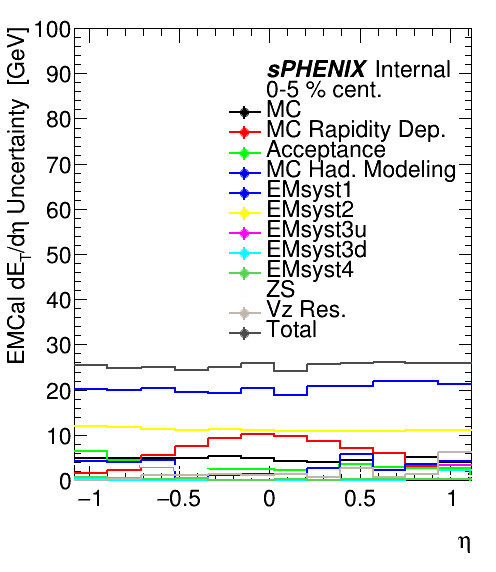

In [29]:
canvas = TCanvas("canvas","",500,600)
leg = ROOT.TLegend(.45,.4,.8,.89)
leg.AddEntry("","#bf{#it{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent} % cent.","")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
for i in range(len(emcal_dev)):
    if i >= 9 and i <= 16:
        continue
    leg.AddEntry(emcal_dev[i],taglabels[i],"lep")
    emcal_dev[i].SetStats(0)
    emcal_dev[i].SetMarkerStyle(20)
    if i >= 17:
        emcal_dev[i].SetLineColor(i-7)
        emcal_dev[i].SetMarkerColor(i-7)
    elif i >= 4:
        emcal_dev[i].SetLineColor(i)
        emcal_dev[i].SetMarkerColor(i)
    else:
        emcal_dev[i].SetLineColor(i+1)
        emcal_dev[i].SetMarkerColor(i+1)
    if i == 0:
        emcal_dev[i].GetYaxis().SetRangeUser(0,y_max[cent])
        emcal_dev[i].SetXTitle("#eta")
        emcal_dev[i].SetYTitle("EMCal dE_{T}/d#eta Uncertainty  [GeV]")
        emcal_dev[i].Draw()
    else:
        emcal_dev[i].Draw('same')
leg.Draw()
canvas.Draw()
#canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/emcal_total_syst_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


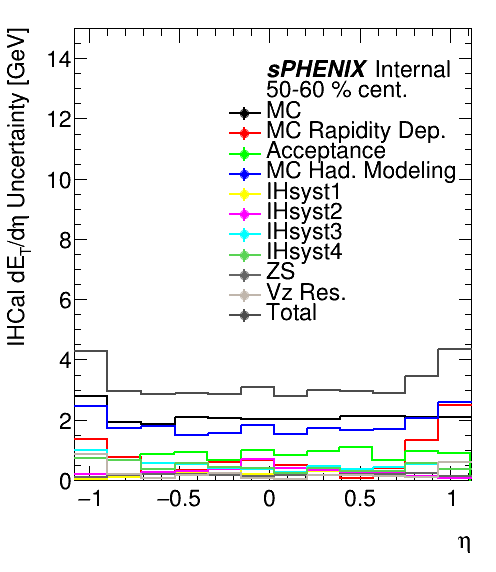

In [68]:
canvas = TCanvas("canvas","",500,600)
leg = ROOT.TLegend(.45,.43,.8,.89)
leg.AddEntry("","#bf{#it{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent} % cent.","")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
for i in range(len(ihcal_dev)):
    if i >= 4 and i <= 8: continue
    if i >= 13 and i <= 16: continue
    leg.AddEntry(ihcal_dev[i],taglabels[i],"lep")
    ihcal_dev[i].SetStats(0)
    ihcal_dev[i].SetMarkerStyle(20)
    if i >= 18:
        ihcal_dev[i].SetLineColor(i-7)
        ihcal_dev[i].SetMarkerColor(i-7)
    elif i >= 9:
        ihcal_dev[i].SetLineColor(i-4)
        ihcal_dev[i].SetMarkerColor(i-4)
    else:
        ihcal_dev[i].SetLineColor(i+1)
        ihcal_dev[i].SetMarkerColor(i+1)
    if i == 0:
        ihcal_dev[i].GetYaxis().SetRangeUser(0,y_max[cent])
        ihcal_dev[i].SetXTitle("#eta")
        ihcal_dev[i].SetYTitle("IHCal dE_{T}/d#eta Uncertainty [GeV]")
        ihcal_dev[i].Draw()
    else:
        ihcal_dev[i].Draw('same')
leg.Draw()
canvas.Draw()
#canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/ihcal_total_syst_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


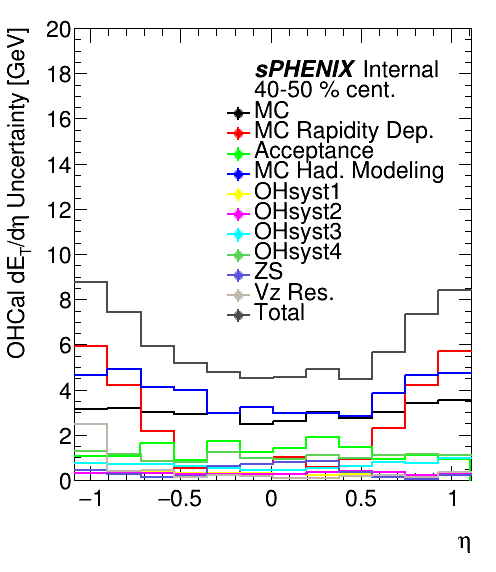

In [33]:
canvas = TCanvas("canvas","",500,600)
leg = ROOT.TLegend(.45,.43,.7,.89)
leg.AddEntry("","#bf{#it{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent} % cent.","")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
for i in range(len(ohcal_dev)):
    if i >= 4 and i <= 12: continue
    leg.AddEntry(ohcal_dev[i],taglabels[i],"lep")
    ohcal_dev[i].SetStats(0)
    ohcal_dev[i].SetMarkerStyle(20)
    if i >= 18:
        ohcal_dev[i].SetLineColor(i-7)
        ohcal_dev[i].SetMarkerColor(i-7)
    elif i >= 13:
        ohcal_dev[i].SetLineColor(i-8)
        ohcal_dev[i].SetMarkerColor(i-8)
    else:
        ohcal_dev[i].SetLineColor(i+1)
        ohcal_dev[i].SetMarkerColor(i+1)
    if i == 0:
        ohcal_dev[i].GetYaxis().SetRangeUser(0,y_max[cent])
        ohcal_dev[i].SetXTitle("#eta")
        ohcal_dev[i].SetYTitle("OHCal dE_{T}/d#eta Uncertainty [GeV]")
        ohcal_dev[i].Draw()
    else:
        ohcal_dev[i].Draw('same')
leg.Draw()
canvas.Draw()
#canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/ohcal_total_syst_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


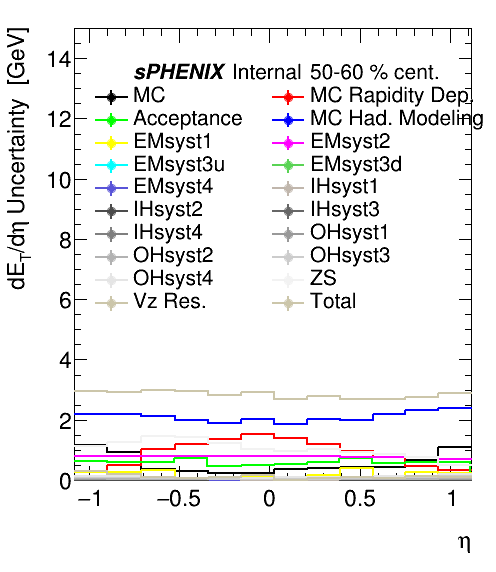

In [70]:
canvas = TCanvas("canvas","",500,600)
leg = ROOT.TLegend(.18,.45,.9,.89)
leg.SetNColumns(2)
leg.SetTextSize(0.045)
leg.AddEntry("","#bf{#it{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent} % cent.","")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
for i in range(len(calo_dev)):
    leg.AddEntry(calo_dev[i],taglabels[i],"lep")
    calo_dev[i].SetStats(0)
    calo_dev[i].SetMarkerStyle(20)
    if i >= 9:
        calo_dev[i].SetLineColor(i+2)
        calo_dev[i].SetMarkerColor(i+2)
    else:
        calo_dev[i].SetLineColor(i+1)
        calo_dev[i].SetMarkerColor(i+1)
    if i == 0:
        calo_dev[i].GetYaxis().SetRangeUser(0,y_max[cent])
        calo_dev[i].SetXTitle("#eta")
        calo_dev[i].SetYTitle("dE_{T}/d#eta Uncertainty  [GeV]")
        calo_dev[i].Draw()
    else:
        calo_dev[i].Draw('same')
leg.Draw()
canvas.Draw()
#canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/calo_total_syst_'+cent+'.png')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


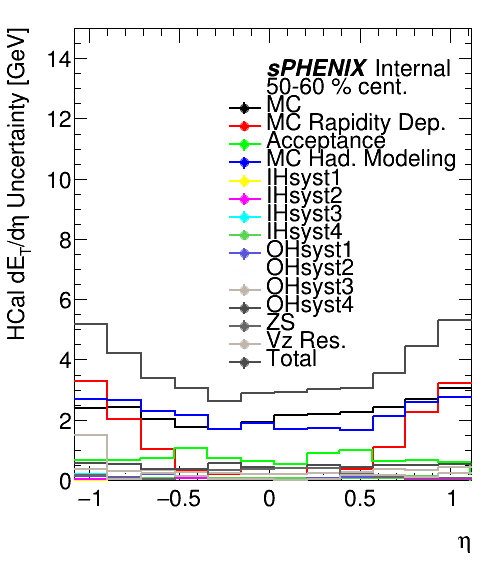

In [35]:
canvas = TCanvas("canvas","",500,600)
leg = ROOT.TLegend(.45,.35,.8,.89)
leg.AddEntry("","#bf{#it{sPHENIX}} Internal","")
leg.AddEntry("",f"{cent} % cent.","")
canvas.SetLeftMargin(0.15)
leg.SetBorderSize(0)
for i in range(len(hcal_dev)):
    if i >= 4 and i <= 8: continue
    leg.AddEntry(hcal_dev[i],taglabels[i],"lep")
    hcal_dev[i].SetStats(0)
    hcal_dev[i].SetMarkerStyle(20)
    if i >= 18:
        hcal_dev[i].SetLineColor(i-7)
        hcal_dev[i].SetMarkerColor(i-7)
    elif i >= 9:
        hcal_dev[i].SetLineColor(i-4)
        hcal_dev[i].SetMarkerColor(i-4)
    else:
        hcal_dev[i].SetLineColor(i+1)
        hcal_dev[i].SetMarkerColor(i+1)
    if i == 0:
        hcal_dev[i].GetYaxis().SetRangeUser(0,y_max[cent])
        hcal_dev[i].SetXTitle("#eta")
        hcal_dev[i].SetYTitle("HCal dE_{T}/d#eta Uncertainty [GeV]")
        hcal_dev[i].Draw()
    else:
        hcal_dev[i].Draw('same')
leg.Draw()
canvas.Draw()
#canvas.SaveAs('/sphenix/u/egm2153/spring_2024/detdeta_plots/ihcal_total_syst_'+cent+'.png')

In [36]:
for i in range(1, emcal_detdeta_dev.GetNbinsX() + 1):
    emcal_detdeta_dev.SetBinContent(i, emcal_dev[-1].GetBinContent((i-1)//2+1))
    emcal_detdeta_dev.SetBinError(i, 0)
for i in range(1, ihcal_detdeta_dev.GetNbinsX() + 1):
    ihcal_detdeta_dev.SetBinContent(i, ihcal_dev[-1].GetBinContent((i-1)//2+1))
    ihcal_detdeta_dev.SetBinError(i, 0)
for i in range(1, ohcal_detdeta_dev.GetNbinsX() + 1):
    ohcal_detdeta_dev.SetBinContent(i, ohcal_dev[-1].GetBinContent((i-1)//2+1))
    ohcal_detdeta_dev.SetBinError(i, 0)
for i in range(1, calo_detdeta_dev.GetNbinsX() + 1):
    calo_detdeta_dev.SetBinContent(i, calo_dev[-1].GetBinContent((i-1)//2+1))
    calo_detdeta_dev.SetBinError(i, 0)
for i in range(1, hcal_detdeta_dev.GetNbinsX() + 1):
    hcal_detdeta_dev.SetBinContent(i, hcal_dev[-1].GetBinContent((i-1)//2+1))
    hcal_detdeta_dev.SetBinError(i, 0)
    
outfile = ROOT.TFile.Open('dETdeta_total_variation_w_hcal_'+cent+'.root',"RECREATE")
emcal_detdeta_dev.Write()
ihcal_detdeta_dev.Write()
ohcal_detdeta_dev.Write()
calo_detdeta_dev.Write()
hcal_detdeta_dev.Write()
outfile.Write()
outfile.Close()

In [72]:
taglabels = ['MC','MC Rapidity Dep.','Acceptance','MC Had. Modeling','EMsyst1','EMsyst2','EMsyst3u','EMsyst3d','EMsyst4',
             'IHsyst1','IHsyst2','IHsyst3','IHsyst4','OHsyst1','OHsyst2','OHsyst3','OHsyst4','ZS','Vz Res.','Total']
for i in range(len(taglabels)):
    print(i, taglabels[i])

0 MC
1 MC Rapidity Dep.
2 Acceptance
3 MC Had. Modeling
4 EMsyst1
5 EMsyst2
6 EMsyst3u
7 EMsyst3d
8 EMsyst4
9 IHsyst1
10 IHsyst2
11 IHsyst3
12 IHsyst4
13 OHsyst1
14 OHsyst2
15 OHsyst3
16 OHsyst4
17 ZS
18 Vz Res.
19 Total


In [72]:
emcal_avg = {'0-5':682.96, '5-10':576.80, '10-20':433.72, '20-30':288.89, '30-40':186.11, '40-50':114.86, '50-60':67.30}
ihcal_avg = {'0-5':740.09, '5-10':619.46, '10-20':465.05, '20-30':312.43, '30-40':204.59, '40-50':127.68, '50-60':75.44}
ohcal_avg = {'0-5':664.84, '5-10':555.44, '10-20':415.52, '20-30':277.10, '30-40':180.06, '40-50':111.44, '50-60':65.18}
calo_avg = {'0-5':680.94, '5-10':578.40, '10-20':432.17, '20-30':289.55, '30-40':187.18, '40-50':115.24, '50-60':67.37}

si = [0,0,1,2,3,3,3,3,3,3,3,3,3,3,3,3,3,4,5,6]
emcal_dev_at_0t = np.zeros(20)
ihcal_dev_at_0t = np.zeros(20)
ohcal_dev_at_0t = np.zeros(20)
calo_dev_at_0t = np.zeros(20)

for i in range(len(emcal_dev)):
    for j in range(1,13):
        emcal_dev_at_0t[i] += emcal_dev[i].GetBinContent(j)/12.0
        ihcal_dev_at_0t[i] += ihcal_dev[i].GetBinContent(j)/12.0
        ohcal_dev_at_0t[i] += ohcal_dev[i].GetBinContent(j)/12.0
        calo_dev_at_0t[i] += calo_dev[i].GetBinContent(j)/12.0
    emcal_dev_at_0t[i] = emcal_dev_at_0t[i]**2
    ihcal_dev_at_0t[i] = ihcal_dev_at_0t[i]**2
    ohcal_dev_at_0t[i] = ohcal_dev_at_0t[i]**2
    calo_dev_at_0t[i] = calo_dev_at_0t[i]**2

emcal_dev_at_0 = np.zeros(7)
ihcal_dev_at_0 = np.zeros(7)
ohcal_dev_at_0 = np.zeros(7)
calo_dev_at_0 = np.zeros(7)

for i in range(len(emcal_dev)):
    emcal_dev_at_0[si[i]] += emcal_dev_at_0t[i]
    ihcal_dev_at_0[si[i]] += ihcal_dev_at_0t[i]
    ohcal_dev_at_0[si[i]] += ohcal_dev_at_0t[i]
    calo_dev_at_0[si[i]] += calo_dev_at_0t[i]

for i in range(7):
    emcal_dev_at_0[i] = np.sqrt(emcal_dev_at_0[i])
    ihcal_dev_at_0[i] = np.sqrt(ihcal_dev_at_0[i])
    ohcal_dev_at_0[i] = np.sqrt(ohcal_dev_at_0[i])
    calo_dev_at_0[i] = np.sqrt(calo_dev_at_0[i])

for i in range(7):
    emcal_dev_at_0[i] /= emcal_avg[cent]
    ihcal_dev_at_0[i] /= ihcal_avg[cent]
    ohcal_dev_at_0[i] /= ohcal_avg[cent]
    calo_dev_at_0[i] /= calo_avg[cent]

[0.018234299653704652, 0.006696287397149805, 0.02796342924192503, 0.010635558108709685, 0.006345067296300207, 0.001179990109738645, 0.03630304909325219]


In [73]:
emcalfilename = '/sphenix/u/egm2153/spring_2024/detdeta_plots/syst_unc_eta=0.csv'
ihcalfilename = '/sphenix/u/egm2153/spring_2024/detdeta_plots/syst_unc_eta=0.csv'
ohcalfilename = '/sphenix/u/egm2153/spring_2024/detdeta_plots/syst_unc_eta=0.csv'
calofilename = '/sphenix/u/egm2153/spring_2024/detdeta_plots/syst_unc_eta=0.csv'

with open(emcalfilename, mode='a', newline='') as emcalfile:
    writer = csv.writer(emcalfile)
    writer.writerow(emcal_dev_at_0)

with open(ihcalfilename, mode='a', newline='') as ihcalfile:
    writer = csv.writer(ihcalfile)
    writer.writerow(ihcal_dev_at_0)
    
with open(ohcalfilename, mode='a', newline='') as ohcalfile:
    writer = csv.writer(ohcalfile)
    writer.writerow(ohcal_dev_at_0)
    
with open(calofilename, mode='a', newline='') as calofile:
    writer = csv.writer(calofile)
    writer.writerow(calo_dev_at_0)